#### s670-2020-01-16.Rmd

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
df = pd.read_csv("data/nba2017-18.csv")
df.head()

,Rk,Player,Season,Age,Tm,Lg,Ht,G,GS,MP,...,BLK,TOV,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%
0,1,Boban Marjanovic\marjabo01,2017-18,29,TOT,NBA,7-3,39,1,337,...,11,36,51,235,0.534,0.534,NaN,0.534,0.794,0.616
1,2,Kristaps Porzingis\porzikr01,2017-18,22,NYK,NBA,7-3,48,48,1553,...,115,93,141,1088,0.439,0.454,0.395,0.489,0.793,0.539
2,3,Salah Mejri\mejrisa01,2017-18,31,DAL,NBA,7-2,61,1,729,...,67,39,121,214,0.642,0.657,0.000,0.642,0.576,0.644
3,4,Dragan Bender\bendedr01,2017-18,20,PHO,NBA,7-1,82,37,2069,...,53,112,166,531,0.386,0.426,0.366,0.508,0.765,0.524
4,5,Tyson Chandler\chandty01,2017-18,35,PHO,NBA,7-1,46,46,1151,...,27,59,106,300,0.647,0.647,NaN,0.647,0.624,0.658


In [3]:
height_list = np.array(df["Ht"].str.split("-").to_list(), dtype=np.int)
height = height_list[:, 0] * 12 + height_list[:, 1]
df["Height"] = height
df["Height"].describe()

count    540.000000
mean      78.931481
std        3.399898
min       69.000000
25%       76.000000
50%       79.000000
75%       82.000000
max       87.000000
Name: Height, dtype: float64

In [4]:
name_list = np.array(df["Player"].str.split("\\").to_list(), dtype=np.str)[:, 0]
df["Name"] = name_list
df.head()

,Rk,Player,Season,Age,Tm,Lg,Ht,G,GS,MP,...,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%,Height,Name
0,1,Boban Marjanovic\marjabo01,2017-18,29,TOT,NBA,7-3,39,1,337,...,51,235,0.534,0.534,NaN,0.534,0.794,0.616,87,Boban Marjanovic
1,2,Kristaps Porzingis\porzikr01,2017-18,22,NYK,NBA,7-3,48,48,1553,...,141,1088,0.439,0.454,0.395,0.489,0.793,0.539,87,Kristaps Porzingis
2,3,Salah Mejri\mejrisa01,2017-18,31,DAL,NBA,7-2,61,1,729,...,121,214,0.642,0.657,0.000,0.642,0.576,0.644,86,Salah Mejri
3,4,Dragan Bender\bendedr01,2017-18,20,PHO,NBA,7-1,82,37,2069,...,166,531,0.386,0.426,0.366,0.508,0.765,0.524,85,Dragan Bender
4,5,Tyson Chandler\chandty01,2017-18,35,PHO,NBA,7-1,46,46,1151,...,106,300,0.647,0.647,NaN,0.647,0.624,0.658,85,Tyson Chandler


In [5]:
Warriors = df[df.Tm == "GSW"]

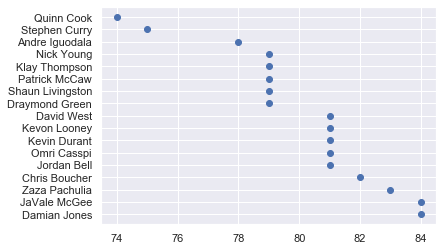

In [6]:
# df.plot.scatter - requires both x and y to be non numric
# Warriors.plot.scatter(x = 'Height', y = 'Name')
plt.scatter(Warriors["Height"], Warriors["Name"])

<BarContainer object of 17 artists>

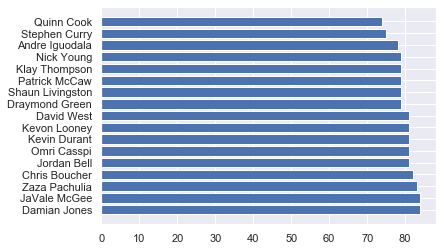

In [7]:
plt.barh(Warriors["Name"], Warriors["Height"])

#### Sorting and plotting

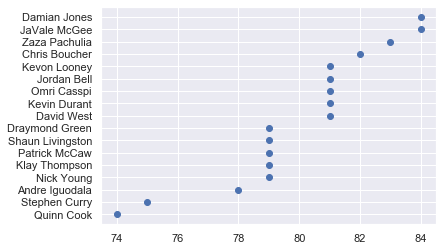

In [8]:
plt.scatter("Height", "Name", data=Warriors.sort_values("Height"))

In [23]:
gsw2017 = pd.read_csv("data/gsw2017-18.csv")
name_list = np.array(gsw2017["Player"].str.split("\\").to_list(), dtype=np.str)[:, 0]
gsw2017["Name"] = name_list
gsw2017_left = gsw2017.merge(df, how="left", on="Name")

#### custome sort on position: "PG", "SG", "SF", "PF", "C" 

with matplotlib: lot of efforts to generate unique colors and labels for all legend (in loop you will have to plot)  
use sns

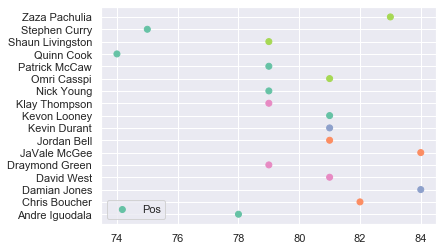

In [26]:
# gsw2017_left["Pos"] = pd.Categorical(gsw2017_left["Pos"], ["PG", "SG", "SF", "PF", "C"])

color_labels = gsw2017_left["Pos"].unique()

# List of RGB triplets
rgb_values = sns.color_palette("Set2", len(color_labels))

# Map label to RGB
color_map = dict(zip(color_labels, rgb_values))

plt.scatter(
    "Height",
    "Name",
    data=gsw2017_left.sort_values("Name"),
    c=gsw2017_left["Pos"].map(color_map),
    label="Pos",
)
plt.legend()

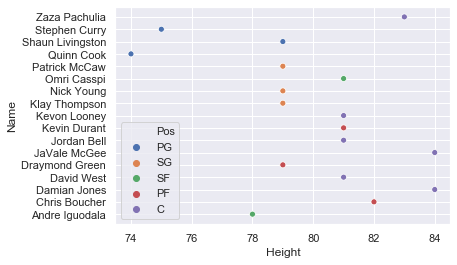

In [30]:
gsw2017_left = gsw2017.merge(df, how="left", on="Name")
gsw2017_left["Pos"] = pd.Categorical(
    gsw2017_left["Pos"], ["PG", "SG", "SF", "PF", "C"], ordered=True
)
sns.scatterplot("Height", "Name", data=gsw2017_left.sort_values("Name"), hue="Pos")

#### legend outside/below axis

AxesSubplot(0.125,0.125;0.775x0.755)


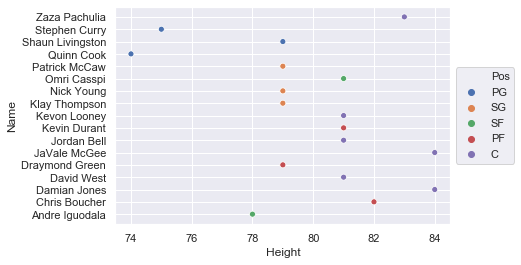

In [47]:
# Shrink current axis's height by 10% on the bottom
sns.scatterplot("Height", "Name", data=gsw2017_left.sort_values("Name"), hue="Pos")
ax = plt.gca()
print(ax)
# box = ax.get_position()
# ax.set_position([box.x0, box.y0 + box.height, box.width, box.height])

# Put a legend below current axis
# plt.legend(
#     loc="upper center", bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5
# )
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))